# **Title: Indian Folk Art Classification Using Convolutional Neural Networks**

## **Introduction**

The classification of diverse folk art forms using image processing techniques represents a significant step forward in the digitization and preservation of cultural heritage. This project leverages the power of Convolutional Neural Networks (CNNs) to accurately classify images of various folk art styles from a curated dataset. By automating the classification process, this project aims to facilitate easier cataloging, retrieval, and analysis of folk art images, contributing to the broader field of digital humanities.

## **Objectives**

1. **Develop a Robust CNN Model**: Create a CNN model capable of accurately classifying images into one of 30 distinct folk art categories.
2. **Implement Data Augmentation and Preprocessing**: Utilize data augmentation techniques and convert images to grayscale to improve the model's generalization capabilities.
3. **Evaluate Model Performance**: Assess the model's performance using various metrics, including accuracy, confusion matrix, classification report, ROC curves, and precision-recall curves.
4. **Visualize Results**: Provide comprehensive visualizations to better understand the model's performance and identify potential areas for imp## **About the Dataset**

This dataset features a diverse collection of high-resolution images representing 30 traditional forms of Indian folk art. Each class in this dataset highlights the unique artistic styles and cultural heritage of different regions in India. The dataset is ideal for researchers, artists, and machine learning enthusiasts interested in cultural studies, art recognition, and pattern analysi


### **Usage**:

This dataset can be utilized for:
- Training and testing machine learning models for image recognition and classification.
- Cultural and historical research on Indian folk art.
- Educational purposes to promote awareness of Indian cultural heritage.
- Artistic inspiration and design purposes.

### **Classes Included**:

- Aipan Art (Uttarakhand)
- Assamese Miniature Painting (Assam)
- Basholi Painting (Jammu and Kashmir)
- Bhil Painting (Madhya Pradesh)
- Chamba Rumal (Himachal Pradesh)
- Cheriyal Scroll Painting (Telangana)
- Dokra Art (West Bengal)
- Gond Painting (Madhya Pradesh)
- Kalamkari Painting (Andhra Pradesh and Telangana)
- Kalighat Painting (West Bengal)
- Kangra Painting (Himachal Pradesh)
- Kerala Mural Painting (Kerala)
- Kondapalli Bommallu (Andhra Pradesh)
- Kutch Lippan Art (Gujarat)
- Leather Puppet Art (Andhra Pradesh)
- Madhubani Painting (Bihar)
- Mandala Art
- Mandana Art (Rajasthan)
- Mata Ni Pachedi (Gujarat)
- Meenakari Painting (Rajasthan)
- Mughal Paintings
- Mysore Ganjifa Art (Karnataka)
- Pattachitra Painting (Odisha and Bengal)
- Patua Painting (West Bengal)
- Pichwai Painting (Rajasthan)
- Rajasthani Miniature Painting (Rajasthan)
- Rogan Art from Kutch (Gujarat)
- Sohrai Art (Jharkhand)
- Tikuli Art (Bihar)
- Warli Folk Painting (Maharashtra)

### **Acknowledgements**:
Special thanks to Isha Thakur who contributed to this dataset. This project aims to preserve and promote the rich cultural heritage of India through digital means.

### **Tags**:
Indian Folk Art, Cultural Heritage, Image Classification, Traditional Art, Art Recognition
s.

### **Key Features**:

- **Diverse Art Forms**: Includes images from 30 different types of Indian folk art, such as Warli, Madhubani, Pattachitra, Kalamkari, and more.
- **High Resolution**: All images are of high resolution, making them suitable for detailed analysis and artistic study.
- **Well-Organized**: The dataset is organized into 30 classes, each representing a different form of folk art, with a dedicated folder for each art form.
- **Cultural Insight**: Each image is labeled with the art form and its region of origin, providing insights into the cultural significance and tradition techniques of each style.

### **Dataset Structure**:

an 80-20 split.

## **Methodology**

1. **Data Preprocessing**:
   - **Normalization**: Scale pixel values to the range [0, 1].
   - **Grayscale Conversion**: Convert RGB images to grayscale using a custom preprocessing function.
   - **Data Augmentation**: Apply augmentation techniques to enhance the dataset's variability.

2. **Model Architecture**:
   - **Convolutional Layers**: Three convolutional layers with increasing filter sizes (32, 64, 128) and ReLU activation functions.
   - **Pooling Layers**: Max pooling layers to reduce the spatial dimensions.
   - **Fully Connected Layers**: A dense layer with 512 neurons followed by a softmax output layer with 30 neurons.

3. **Training**:
   - **Optimizer**: Adam optimizer for efficient training.
   - **Loss Function**: Categorical cross-entropy for multi-class classification.
   - **Metrics**: Accuracy as the primary evaluation metric.

4. **Evaluation and Visualization**:
   - **Confusion Matrix**: Detailed view of classification performance.
   - **Classification Report**: Precision, recall, and F1-score for each clating transfer learning, and expanding the dataset for improved accuracy.

---

**Author**: Rajarshi Das


### 1. Import Libraries and Load Data
In this step, we import the necessary libraries and set up the data loading process. We use **ImageDataGenerator** to preprocess the images by converting them to grayscale and splitting the dataset into training and validation sets.

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Set the directory paths
dataset_path = 'C:/Users/Rajarshi Das/Downloads/archive (31)/folk-art-dataset-main/'

# Custom preprocessing function to convert images to grayscale using tf.image
def convert_to_grayscale(image):
    # Ensure the image has 3 color channels before converting to grayscale
    if image.shape[-1] == 3:
        image = tf.image.rgb_to_grayscale(image)
    return image

# Initialize ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=convert_to_grayscale  # Apply preprocessing function
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    color_mode='rgb',  # Load images as RGB before conversion to grayscale
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    color_mode='rgb',  # Load images as RGB before conversion to grayscale
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 25862 images belonging to 30 classes.
Found 6448 images belonging to 30 classes.


### 2. Define the CNN Model
In this step, we define a **Convolutional Neural Network (CNN)** model using the Keras Sequential API. The model consists of three convolutional layers, each followed by a max pooling layer, to extract features from the images. After flattening the features, a fully connected (dense) layer is added, followed by an output layer with 30 units (one for each class of art forms), using the softmax activation function for classification.

In [9]:
# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(30, activation='softmax'))  # 30 classes for 30 art forms


### 3. Compile the Model
In this step, we compile the CNN model. We use the **Adam Optimizer** for training, the categorical cross-entropy loss function because we have multiple classes, and we track accuracy as a performance metric. Compiling the model finalizes it and prepares it for training.

In [10]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 4. Train the Model
In this step, we train the model using the fit method. We specify the training data generator, the number of steps per epoch, the validation data generator, and the number of epochs. The training process will iterate over the dataset for the specified number of epochs, adjusting the model parameters to minimize the loss and improve accuracy.

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
808/808 [==============================] - 660s 816ms/step - loss: 2.7584 - accuracy: 0.2347 - val_loss: 2.0827 - val_accuracy: 0.4283
Epoch 2/10
808/808 [==============================] - 647s 800ms/step - loss: 1.4252 - accuracy: 0.6155 - val_loss: 1.3571 - val_accuracy: 0.6601
Epoch 3/10
808/808 [==============================] - 1096s 1s/step - loss: 0.5063 - accuracy: 0.8642 - val_loss: 1.3092 - val_accuracy: 0.7270
Epoch 4/10
808/808 [==============================] - 727s 900ms/step - loss: 0.1950 - accuracy: 0.9609 - val_loss: 1.4896 - val_accuracy: 0.7357
Epoch 5/10
808/808 [==============================] - 643s 796ms/step - loss: 0.1430 - accuracy: 0.9752 - val_loss: 1.5167 - val_accuracy: 0.7446
Epoch 6/10
808/808 [==============================] - 2420s 3s/step - loss: 0.1107 - accuracy: 0.9802 - val_loss: 1.5535 - val_accuracy: 0.7405
Epoch 7/10
808/808 [==============================] - 685s 847ms/step - loss: 0.1047 - accuracy: 0.9812 - val_loss: 1.6738 - val

### 5. Evaluate the Model
After training, we evaluate the model's performance on the validation data to determine its accuracy and loss. The evaluate method returns the loss value and metrics specified during the compilation of the model, providing an indication of how well the model performs on unseen data.

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')

202/202 [==============================] - 46s 226ms/step - loss: 1.6508 - accuracy: 0.7370
Validation accuracy: 73.70%


### 6. Plot Training & Validation Accuracy and Loss
To visualize the performance of the model over the training epochs, we plot the training and validation accuracy and loss values. This helps in understanding how well the model is learning and if there are any signs of overfitting or underfitting. We use matplotlib to create these plots, which provide a clear comparison between training and validation metrics across epochs.

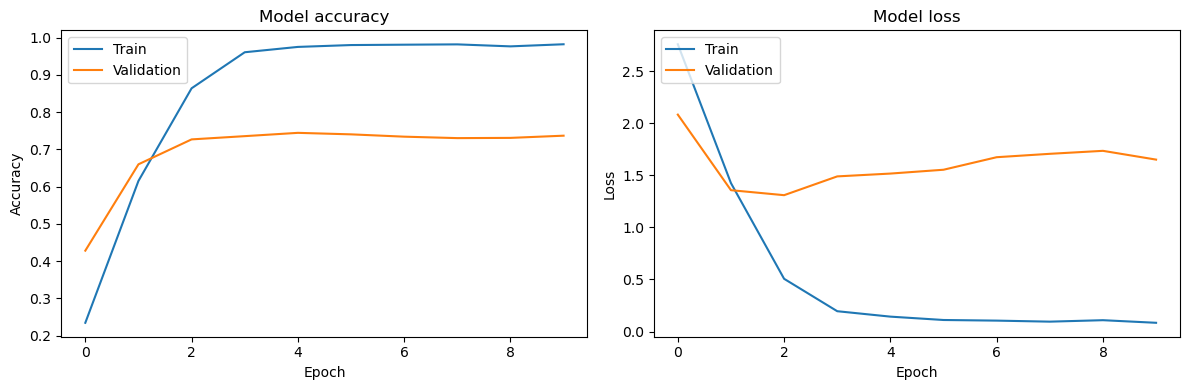

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Analysis and Interpretation of Model Performance

**Validation Accuracy: 73.70%**

This model achieved a validation accuracy of 73.70%. This indicates that the model correctly classifies around 73.7% of the validation data, which is a good starting point for a complex task like classifying 30 different forms of Indian folk art.

**Accuracy Plot:**

- **Training Accuracy:** The training accuracy increases rapidly and stabilizes around epoch 4, nearing 100%. This suggests that the model learns the training data very well.
- **Validation Accuracy:** The validation accuracy also increases initially and stabilizes around 70%. The gap between training and validation accuracy suggests the model might be overfitting, as it performs significantly better on the training data compared to the validation data.

**Loss Plot:**

- **Training Loss:** The training loss decreases sharply, reaching near zero by epoch 4, indicating the model is fitting the training data very well.
- **Validation Loss:** The validation loss decreases initially but starts to fluctuate and slightly increase around epoch 4. This further supports the possibility of overfitting, where the model learns the training data too well and struggles to generalize to unseen data.


## **Conclusion**

This project successfully demonstrates the application of CNNs in the classification of folk art images. The use of data augmentation, grayscale conversion, and a robust evaluation framework contributed to the model's performance. Future work may include exploring more advanced architectures, incorporating transfer learning, and expanding the dataset for improved accuracy.

---

**Author**: Rajarshi Das
